In [87]:
#setting up imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Union

In [88]:
from random import seed
from random import randint
from random import random

#checks if a point is negative or positive class
def classification(a: float, b: float, coord1: float, coord2: float)->int:
    return 1 if coord1 * a + b > coord2 else -1

#generate dataset of points inside the box [(0, 0), (0, 1), (1, 0), (1, 1)]
def generate_dataset():
    number_of_points = randint(10, 100)
    dataset = []
    print("Number of points:", number_of_points)

    f = open("dataset.csv", "w")
    f.write("x1, x2, y\n")
    seed(1)

    for index in range(0, number_of_points):
        x1 = round(random(),3)
        x2 = round(random(), 3)
        y = classification(-1, 1, x1, x2)

        dataset.append((x1, x2, y))

        f.write(str(dataset[index][0]) + ", ")
        f.write(str(dataset[index][1]) + ", ")
        f.write(str(dataset[index][2]))
        f.write("\n")

In [89]:
#call the generate dataset function
generate_dataset()

Number of points: 88


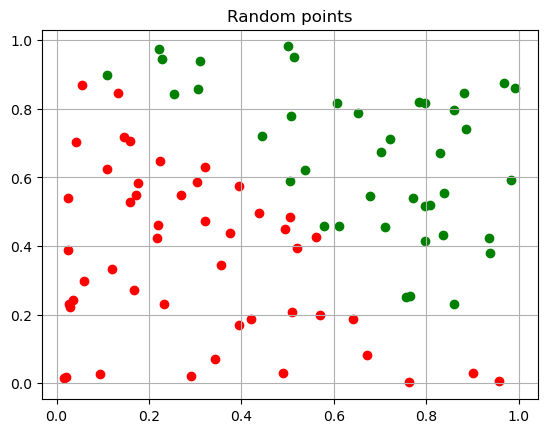

In [90]:
#read the dataset from the file and plot it
dataset = pd.read_csv('dataset.csv').values

x1_set = dataset[:,0]
x2_set = dataset[:,1]
y_set = dataset[:, 2]
x_set = np.array([x1_set, x2_set]).T

for i in range(0,len(x1_set)):
    color = 'green'
    if y_set[i] > 0:
        color = 'red'
    plt.scatter(x1_set[i],x2_set[i],c = color)
plt.title("Random points")
plt.grid()
plt.show()

In [91]:
#add a column of ones for a specified numpy array
def add_ones_column(x: np.ndarray) -> np.ndarray:
    ones = np.ones([x.shape[0], 1])
    return np.concatenate((ones, x), axis=1)

#add a column of ones
x_set_ext = add_ones_column(x_set)

In [92]:
#step function for the perceptron
def step_function(z: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    if isinstance(z, float):
        return 1 if z >= 0. else -1
    z[z >= 0.] = 1.
    z[z < 0.] = -1.
    return z

#call the model
def h(x_set: Union[float, np.ndarray], theta: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    return step_function(x_set @ theta)

In [93]:
#init weights with random values [0, 1]
theta = np.random.rand(x_set_ext.shape[1])

In [94]:
#calculate accuracy for the perceptron model(not needed)
def get_accuracy(x_set: np.ndarray, y_set: np.ndarray, theta: np.ndarray) -> float:
    pred = np.squeeze(h(x_set, theta))
    return 100 * np.sum(y_set == pred) / y_set.shape[0]

In [95]:
def print_plot(theta: np.ndarray) -> None:
    x_point = np.linspace(0, 1, 100)
    w0, w1, w2 = theta[0], theta[1], theta[2]
    y_point = (-(w0 / w2) / (w0 / w1)) * x_point + (-w0 / w2)
    plt.plot(x_point, y_point, color="magenta")
    for i in range(0,len(x_set)):
        color = 'green'
        if y_set[i] > 0:
            color = 'red'
        plt.scatter(x1_set[i],x2_set[i],c = color)
    plt.title("THe points dataset with the perception line")
    plt.grid()
    plt.show()

In [96]:
#define the train loop
def train(x_set: np.ndarray, y_set: np.ndarray, theta: np.ndarray, epochs=50, lr=0.01) -> np.ndarray:
    for epoch in range(epochs):
        if epoch % 10 == 0:
                print_plot(theta)
        for index, x_i in enumerate(x_set):
            pred = np.squeeze(h(x_i.T, theta))
            if y_set[index] - pred != 0:
                theta += lr / 2 * ((y_set[index] - pred) * x_i)
    return theta

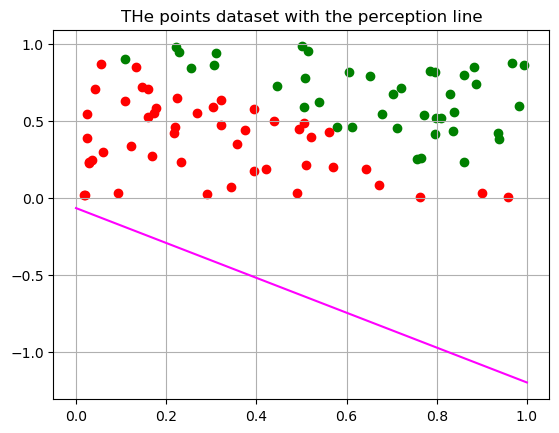

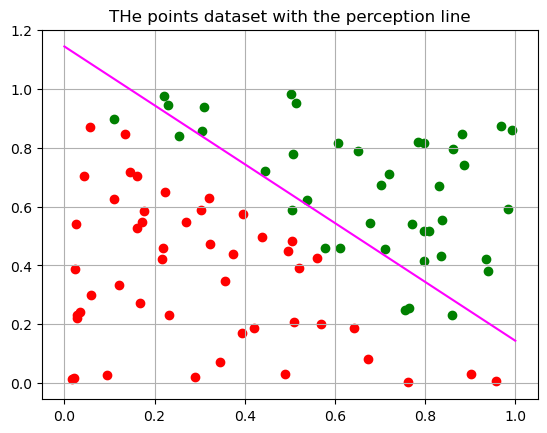

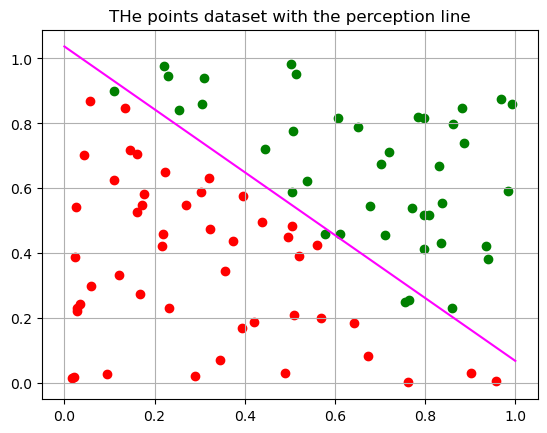

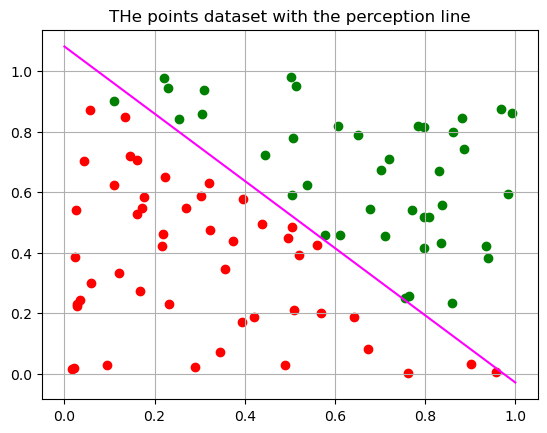

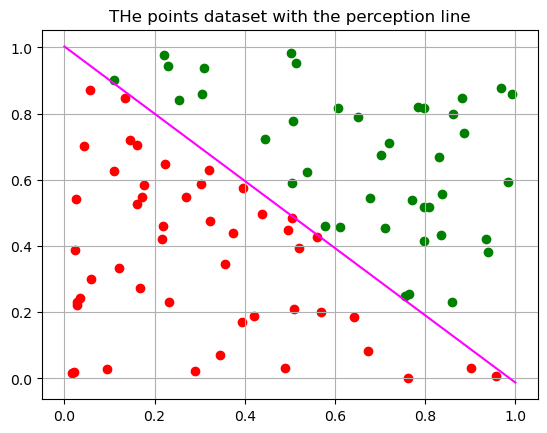

Accuracy for the set: 100.0


In [97]:
#train for theta and print the accuracy for verification
theta = train(x_set_ext, y_set, theta)
print("Accuracy for the set:", get_accuracy(x_set_ext, y_set, theta))

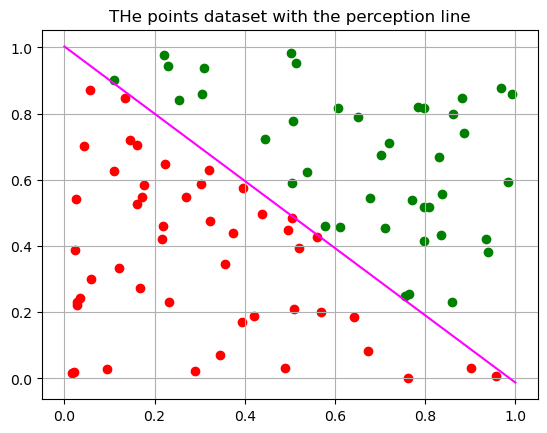

In [98]:
#plot the points and the decision boundary

#plot the decision boundary
print_plot(theta)